# Определение перспективного тарифа для телеком-компании

В данном проекте будет изучен срез из 500 пользователей федерального оператора сотовой связи "Мегалайн" для определения наиболее перспективного тарифа из двух предложенных- "Смарт" и "Ультра". В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

План выполнения проекта представлен ниже.

Открытие файлов, просмотр и предварительная подготовка данных:

1. Открыть файлы и проанализировать данные, содержащиеся в них.
2. Найти ошибки в данных и исправить их.
3. Объединить датасеты в один файл. 
4. Проверить корректность объединения.
5. Посмотреть инфо по столбцам.
6. Проверить значения в столбцах.
7. Посмотреть пропущенные значения.
8. Привести данные к нужным типам.
9. Исправление ошибок в столбцах.
10. Заполнить отсутствующие значения.

Категоризация данных:
1. Выделение возрастных категорий.
2. В сводной таблице для каждого пользователя посчитать по месяцам количество потраченных минут, отправленных СМС и израсходованного интернет-трафика.
3. В сводной таблице определить помесячную выручку с каждого пользователя.

Анализ данных:
1. Построить гистограммы и диаграммы размаха выручки по пользователям разных тарифов, определить среднее, дисперсию и стандартное отклонение.
2. Изучить, сколько минут, сообщений и интернет-трафика требуется пользователям каждого тарифа в месяц.
3. Проверить, различается ли выручка с пользователей разных тарифов. Нулевая гипотеза- выручки пользователей тарифов равны. Альтернативная гипотеза- выручки не равны. Здесь ожидается, что выручка пользователей тарифа "Ультра" выше,чем тарифа "Смарт".
4. Проверить, различается ли выручка пользователей из Москвы и из других регионов. Нулевая гипотеза- выручки равны. Альтернативная- выручки не равны. Здесь ожидается, что выручка пользователей из Москвы выше.
5. Проверить распределение возрастных категорий среди пользователей каждого тарифа.
6. Проверить, как меняются израсходованные пакеты минут, сообщений и интернет-трафика в зависимости от возраста пользователя.

Ниже импортируем библиотеки, которые будут использованы в проекте.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st 
import seaborn as sns
pd.options.display.float_format = '{:,.1f}'.format

## Открытие файла и объединение данных

В нашем распоряжении следующие файлы: 
* calls.csv - файл с информацией о длительности звонков пользователей;
* internet.csv - файл с информацией об интернет-сессиях пользователей;
* messages.csv - файл с информацией об отправленных пользователем сообщениях;
* tariffs.csv - файл с информацией о тарифах;
* users.csv - файл с информацией о пользователях.

Откроем их по отдельности и изучим данные, содержащиеся в них, после чего объединим по общему столбцу.

In [2]:
try:
    df_users = pd.read_csv('/datasets/users.csv')
except:
    df_users = pd.read_csv('datasets/users.csv')
#изменим тип данных в столбце с идентификатором пользователя на целочисленный
df_users['user_id'] = df_users['user_id'].astype('int')
#приведем столбцы с датой к формату datetime
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
display(df_users.head(10))
display(df_users.info())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaT,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaT,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaT,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaT,Пермь,Василиса,Блинова,2018-03-22,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int32
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int32(1), int64(1), object(4)
memory usage: 29.4+ KB


None

Здесь видим 500 строк, в каждой из которых- пользователь с уникальным user_id. У пользователей указан возраст в столбце age, дата отключения от тарифа в столбце churn_date, город проживания в столбце city, имя, фамилия, дата регистрации и название используемого тарифа. Рассмотрим, какие данные содержаться в столбце с названиями городов, чтобы избежать неявных дубликатов.

In [3]:
df_users['city'].sort_values().unique()

array(['Архангельск', 'Астрахань', 'Балашиха', 'Барнаул', 'Белгород',
       'Брянск', 'Владивосток', 'Владикавказ', 'Владимир', 'Волгоград',
       'Волжский', 'Вологда', 'Воронеж', 'Грозный', 'Екатеринбург',
       'Иваново', 'Ижевск', 'Иркутск', 'Казань', 'Калининград', 'Калуга',
       'Кемерово', 'Киров', 'Кострома', 'Краснодар', 'Красноярск',
       'Курган', 'Курск', 'Липецк', 'Магнитогорск', 'Махачкала', 'Москва',
       'Мурманск', 'Набережные Челны', 'Нижневартовск', 'Нижний Новгород',
       'Нижний Тагил', 'Новокузнецк', 'Новороссийск', 'Новосибирск',
       'Омск', 'Оренбург', 'Орёл', 'Пенза', 'Пермь', 'Петрозаводск',
       'Подольск', 'Ростов-на-Дону', 'Рязань', 'Самара',
       'Санкт-Петербург', 'Саранск', 'Саратов', 'Севастополь', 'Смоленск',
       'Сочи', 'Ставрополь', 'Стерлитамак', 'Сургут', 'Тамбов', 'Тверь',
       'Тольятти', 'Томск', 'Тула', 'Тюмень', 'Улан-Удэ', 'Ульяновск',
       'Уфа', 'Хабаровск', 'Химки', 'Чебоксары', 'Челябинск', 'Череповец',
       'Чи

Неявных дубликатов в названиях городов нет. Рассмотрим столбец с возрастом пользователей, чтобы избежать ошибок в значениях.

In [4]:
df_users['age'].describe()

count   500.0
mean     46.6
std      16.7
min      18.0
25%      32.0
50%      46.0
75%      62.0
max      75.0
Name: age, dtype: float64

Возраст пользователей распределен от 18 до 75 лет, средний возраст- 47 лет. Данные выглядят нормально, ошибок нет.

Выведем на экран значения в столбце 'tariff', чтобы убедиться, что для всех пользователей указан тариф.

In [5]:
df_users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

Пропусков нет, для всех пользователей указан тариф.

Далее откроем файл с информацией по звонкам и просмотрим данные в нем.

In [6]:
try:
    df_calls = pd.read_csv('/datasets/calls.csv')
except:
    df_calls = pd.read_csv('datasets/calls.csv')
#приведем столбец с датой к формату datetime
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
#добавим столбец с информацией о месяце, в котором был совершен звонок
df_calls['billing_month'] = df_calls['call_date'].dt.month
display(df_calls.head(10))
display(df_calls.info())
display(df_calls.describe().transpose())

,id,call_date,duration,user_id,billing_month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,2.9,1000,6
3,1000_3,2018-09-21,13.8,1000,9
4,1000_4,2018-12-15,5.2,1000,12
5,1000_5,2018-11-02,0.0,1000,11
6,1000_6,2018-10-18,0.0,1000,10
7,1000_7,2018-08-22,18.3,1000,8
8,1000_8,2018-09-15,18.4,1000,9
9,1000_9,2018-08-15,0.0,1000,8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
id               202607 non-null object
call_date        202607 non-null datetime64[ns]
duration         202607 non-null float64
user_id          202607 non-null int64
billing_month    202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 7.7+ MB


None

,count,mean,std,min,25%,50%,75%,max
duration,"202,607.0",6.8,5.8,0.0,1.3,6.0,10.7,38.0
user_id,"202,607.0","1,253.9",144.7,"1,000.0","1,126.0","1,260.0","1,379.0","1,499.0"
billing_month,"202,607.0",8.6,2.8,1.0,7.0,9.0,11.0,12.0


В данном датасете 202607 строк, в каждой из которой- информация об отдельном звонке абонента с указанием даты звонка, уникальным номером пользователя и длительностью звонка в минутах. В столбце с длительностью звонка минимальное значение 0- так обозначаются звонки без ответа. Максимальное значение- 38 минут. Выглядит логично, ошибок в столбце нет.

Из "сырой" таблицы со звонками создадим структурированную таблицу с информацией об общем количестве потраченных минут по месяцам для каждого пользователя, сгруппировав данные и округлив их до целого в большую сторону, так как при расчетах "Мегалайн" делает именно так.

In [7]:
#сгруппируем данные и просуммируем длительность звонков по пользователям за каждый месяц, исключая звонки без ответа
df_calls_grouped = df_calls[df_calls['duration'] > 0].groupby(by=['user_id', 'billing_month']).sum()
#округлим длительность звонков до целого в большую сторону и изменим тип данных на целочисленный
df_calls_grouped['duration'] = np.ceil(df_calls_grouped['duration']).astype('int')
display(df_calls_grouped)
display(df_calls_grouped.info())

duration
user_id billing_month          
1000    5                   151
        6                   159
        7                   319
        8                   390
        9                   441
...                         ...
1498    10                  233
1499    9                    65
        10                  430
        11                  577
        12                  466

[3168 rows x 1 columns]

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3168 entries, (1000, 5) to (1499, 12)
Data columns (total 1 columns):
duration    3168 non-null int32
dtypes: int32(1)
memory usage: 25.7 KB


None

Далее просмотрим файл с информацией о сообщениях пользователя.

In [8]:
try:
    df_messages = pd.read_csv('/datasets/messages.csv')
except:
    df_messages = pd.read_csv('datasets/messages.csv')
#приведем столбец с датой к формату datetime
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
#добавим столбец с информацией о месяце, когда было отправлено сообщение
df_messages['billing_month'] = df_messages['message_date'].dt.month
display(df_messages.head(10))
display(df_messages.info())

,id,message_date,user_id,billing_month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
5,1000_5,2018-06-20,1000,6
6,1000_6,2018-11-19,1000,11
7,1000_7,2018-10-29,1000,10
8,1000_8,2018-06-25,1000,6
9,1000_9,2018-12-18,1000,12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
id               123036 non-null object
message_date     123036 non-null datetime64[ns]
user_id          123036 non-null int64
billing_month    123036 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.8+ MB


None

В датасете 'messages.csv' содержится информация об отправленных сообщениях. В каждой строке- одно сообщение, отправленное пользователем с уникальным номером и информацией о дате отправки. Также создадим структурированную таблицу с информацией об общем количестве сообщений в месяц для каждого пользователя.

In [9]:
#сгруппируем данные и посчитаем сообщения для каждого пользователя за месяц
df_messages_grouped = df_messages.groupby(by=['user_id', 'billing_month']).count()
#удалим лишний столбец
df_messages_grouped.drop('id', inplace=True, axis=1)
#изменим имя столбца и тип данных на целочисленный
df_messages_grouped.columns = ['message_count']
df_messages_grouped['message_count'] = df_messages_grouped['message_count'].astype('int')
display(df_messages_grouped)
display(df_messages_grouped.info())

message_count
user_id billing_month               
1000    5                         22
        6                         60
        7                         75
        8                         81
        9                         57
...                              ...
1498    10                        42
1499    9                         11
        10                        48
        11                        59
        12                        66

[2717 rows x 1 columns]

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2717 entries, (1000, 5) to (1499, 12)
Data columns (total 1 columns):
message_count    2717 non-null int32
dtypes: int32(1)
memory usage: 22.1 KB


None

Далее просмотрим файл с информацией с сессиями интернет-трафика пользователем.

In [10]:
try:
    df_internet = pd.read_csv('/datasets/internet.csv')
except:
    df_internet = pd.read_csv('datasets/internet.csv')
#приведем столбец с датой к формату datetime
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
# добавим столбец с информацией о месяце использования интернета
df_internet['billing_month'] = df_internet['session_date'].dt.month
display(df_internet.head())
display(df_internet.info())

,Unnamed: 0,id,mb_used,session_date,user_id,billing_month
0,0,1000_0,113.0,2018-11-25,1000,11
1,1,1000_1,"1,052.8",2018-09-07,1000,9
2,2,1000_2,"1,197.3",2018-06-25,1000,6
3,3,1000_3,550.3,2018-08-22,1000,8
4,4,1000_4,302.6,2018-09-24,1000,9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 6 columns):
Unnamed: 0       149396 non-null int64
id               149396 non-null object
mb_used          149396 non-null float64
session_date     149396 non-null datetime64[ns]
user_id          149396 non-null int64
billing_month    149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 6.8+ MB


None

В файле 'internet.csv' содержится информация об отдельных интернет сессиях каждого пользователя в 149396 строках. В "Мегалайне" округляют использованный трафик в конце месяца до целых гигабайт, поэтому для каждого пользователя в данном файле необходимо сложить мегабайты по месяцам, разделить на 1024 и округлить значение до целого в большую сторону. Создадим таблицу, сгруппированную по месяцам для каждого пользователя. Использованный трафик сложим, разделим на 1024 и округлим до целого в большую сторону.

In [11]:
# сгруппируем данные и посчитаем для пользователя за каждый месяц суммарный трафик в гигабайтах
df_internet_grouped = df_internet.groupby(by=['user_id', 'billing_month']).sum() / 1024
# округлим трафик в большуб сторону до целого
df_internet_grouped['mb_used'] = np.ceil(df_internet_grouped['mb_used']).astype('int')
# удалим лишний столбец
df_internet_grouped.drop('Unnamed: 0', inplace=True, axis=1)
# переименуем столбец
df_internet_grouped.columns = ['gb_used']
display(df_internet_grouped)
display(df_internet_grouped.info())

gb_used
user_id billing_month         
1000    5                    3
        6                   23
        7                   14
        8                   14
        9                   15
...                        ...
1498    10                  21
1499    9                    2
        10                  18
        11                  18
        12                  13

[3203 rows x 1 columns]

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3203 entries, (1000, 5) to (1499, 12)
Data columns (total 1 columns):
gb_used    3203 non-null int32
dtypes: int32(1)
memory usage: 26.0 KB


None

In [12]:
try:
    df_tariffs = pd.read_csv('/datasets/tariffs.csv')
except:
    df_tariffs = pd.read_csv('datasets/tariffs.csv')
# изменим название столбца по аналогии с файлом users.csv, чтобы объединить данные по нему
df_tariffs = df_tariffs.rename(columns={'tariff_name':'tariff'})
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


В данном файле содержится общая информация о тарифах: количество включенных в тариф сообщений, мегабайт интернета, минут разговора, стоимости тарифа в месяц, стоимости дополнительных пакетов интернета, сообщений, минут разговора и название тарифа. Создадим объединенную таблицу, содержащую в себе информацию о потраченных минутах, сообщениях и гигабайтах интернет-трафика каждым пользователем по месяцам.

In [13]:
# объединим данные в одну таблицу
df_used = pd.merge(df_calls_grouped, df_messages_grouped, how='outer', on=['user_id', 'billing_month'])
df_used = pd.merge(df_used, df_internet_grouped, how='outer', on=['user_id', 'billing_month'])
# переведем таблицу из типа groupby в DataFrame
df_used = pd.DataFrame(df_used).reset_index()
display(df_used)
display(df_used.info())

,user_id,billing_month,duration,message_count,gb_used
0,1000,5,151.0,22.0,3.0
1,1000,6,159.0,60.0,23.0
2,1000,7,319.0,75.0,14.0
3,1000,8,390.0,81.0,14.0
4,1000,9,441.0,57.0,15.0
...,...,...,...,...,...
3209,1489,10,nan,21.0,20.0
3210,1489,11,nan,20.0,18.0
3211,1489,12,nan,35.0,17.0
3212,1240,2,nan,nan,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
user_id          3214 non-null int64
billing_month    3214 non-null int64
duration         3168 non-null float64
message_count    2717 non-null float64
gb_used          3203 non-null float64
dtypes: float64(3), int64(2)
memory usage: 125.7 KB


None

Окончательно объединим три таблицы- с информацией о пользователях, с расчитанными по месяцам показателям для каждого пользователя и с информацией о тарифах. Добавим столбец, содержащий информацию об оплате за месяц, исходя из рассчитанных показателей и информации о тарифе. Столбцы с пакетами минут, сообщений и интернета превратим в столбцы с превышением пакета пользователем в текущем месяце, так как сами по себе эти столбцы не несут важной информации, а информация в таком виде позволит рассчитать процент пользователей, превышающих лимиты.

In [14]:
# объединим данные
df_final = df_users.merge(df_used, on='user_id', how='outer')
df_final = df_final.merge(df_tariffs, on='tariff', how='inner')
# заполним пропуски в столбцах с временем разговора, количеством сообщений и использованного трафика значением 0
# так как наличие пропусков в данных столбцах вызвано отсутствием звонков, сообщений и трафика в данном месяце
df_final['duration'] = df_final['duration'].fillna(0)
df_final['message_count'] = df_final['message_count'].fillna(0)
df_final['gb_used'] = df_final['gb_used'].fillna(0)
# столбцы из таблицы tariffs, в которых указано максимальное значение минут, сообщений и трафика в тарифе
# превратим в столбцы с информацией о превышении пользователем указанных значений
# превышение получим следующим образом: (abs(b - a) + b - a) / 2
# так, если пользователь не превысил лимит, соответствующее значение в столбце будет равно нулю
df_final['minutes_included'] = (abs(df_final['duration'] - df_final['minutes_included']) + df_final['duration'] - df_final['minutes_included']) / 2
df_final['messages_included'] = (abs(df_final['message_count'] - df_final['messages_included']) + df_final['message_count'] - df_final['messages_included']) / 2
df_final['mb_per_month_included'] = (abs(df_final['gb_used'] - df_final['mb_per_month_included'] / 1024) + df_final['gb_used'] - df_final['mb_per_month_included'] / 1024) / 2
# переименуем столбцы в соответствии с информацией, содержащейся в них
df_final = df_final.rename(columns={'minutes_included':'minutes_over', 'messages_included':'messages_over', 'mb_per_month_included':'gb_over'})
# вычислим, сколько каждый пользователь заплатил за месяц
df_final['monthly_payment'] = df_final['rub_monthly_fee'] + (df_final['rub_per_minute'] * df_final['minutes_over']) + (df_final['rub_per_message'] * df_final['messages_over']) + (df_final['rub_per_gb'] * df_final['gb_over'])
display(df_final.sample(5))
display(df_final.info())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,billing_month,duration,message_count,gb_used,messages_over,gb_over,minutes_over,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,monthly_payment
2948,1438,24,2018-12-24,Екатеринбург,Нателла,Бородина,2018-10-05,smart,10.0,271.0,53.0,13.0,3.0,0.0,0.0,550,200,3,3,559.0
289,1166,48,NaT,Нижний Новгород,Святослав,Жданов,2018-08-17,ultra,10.0,406.0,115.0,14.0,0.0,0.0,0.0,1950,150,1,1,"1,950.0"
1482,1112,51,NaT,Ульяновск,Арнольд,Казанцев,2018-09-04,smart,9.0,442.0,85.0,14.0,35.0,0.0,0.0,550,200,3,3,655.0
2821,1417,34,NaT,Тольятти,Исак,Макаров,2018-07-19,smart,10.0,310.0,78.0,11.0,28.0,0.0,0.0,550,200,3,3,634.0
2421,1314,27,NaT,Киров,Максим,Амелишко,2018-03-04,smart,9.0,490.0,33.0,17.0,0.0,2.0,0.0,550,200,3,3,950.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 20 columns):
user_id            3216 non-null int32
age                3216 non-null int64
churn_date         189 non-null datetime64[ns]
city               3216 non-null object
first_name         3216 non-null object
last_name          3216 non-null object
reg_date           3216 non-null datetime64[ns]
tariff             3216 non-null object
billing_month      3214 non-null float64
duration           3216 non-null float64
message_count      3216 non-null float64
gb_used            3216 non-null float64
messages_over      3216 non-null float64
gb_over            3216 non-null float64
minutes_over       3216 non-null float64
rub_monthly_fee    3216 non-null int64
rub_per_gb         3216 non-null int64
rub_per_message    3216 non-null int64
rub_per_minute     3216 non-null int64
monthly_payment    3216 non-null float64
dtypes: datetime64[ns](2), float64(8), int32(1), int64(5), object(4)
memory 

None

Во всех столбцах, кроме churn_date и billing_month одинаковое количество ненулевых значений. В столбце churn_date ненулевые значения- это дата завершения контракта, то есть пропущенные значения- это активные абоненты. В столбце billing_month не хватает двух строк. Выведем на экран эти строки и попробуем понять, с чем связаны пропуски в них.

In [15]:
df_final[df_final['billing_month'].isna() == True]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,billing_month,duration,message_count,gb_used,messages_over,gb_over,minutes_over,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,monthly_payment
243,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,nan,0.0,0.0,0.0,0.0,0.0,0.0,1950,150,1,1,"1,950.0"
2619,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,nan,0.0,0.0,0.0,0.0,0.0,0.0,550,200,3,3,550.0


В обеих строках видим, что пользователи не использовали свои пакеты- у них нет ни звонков, ни сообщений, ни трафика. Оба они зарегистрированы в декабре и оба расторгли свои контракты через неделю. В условии к проекту не указано, являются ли эти тарифы предоплатными или постоплатными. В предположении, что данные тарифы предоплатные, заполним пропуски в этих столбцах месяцем регистрации- то есть числом 12.

In [16]:
df_final['billing_month'] = df_final['billing_month'].fillna(12)

Изменим тип данных на целочисленный в столбцах с месяцем оплаты, длительностью звонков, использованных сообщениях, интернет-трафике, превышении лимитов и оплатой за месяц.

In [17]:
df_final['billing_month'] = df_final['billing_month'].astype('int')
df_final['duration'] = df_final['duration'].astype('int')
df_final['message_count'] = df_final['message_count'].astype('int')
df_final['gb_used'] = df_final['gb_used'].astype('int')
df_final['messages_over'] = df_final['messages_over'].astype('int')
df_final['gb_over'] = df_final['gb_over'].astype('int')
df_final['minutes_over'] = df_final['minutes_over'].astype('int')
df_final['monthly_payment'] = df_final['monthly_payment'].astype('int')
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 20 columns):
user_id            3216 non-null int32
age                3216 non-null int64
churn_date         189 non-null datetime64[ns]
city               3216 non-null object
first_name         3216 non-null object
last_name          3216 non-null object
reg_date           3216 non-null datetime64[ns]
tariff             3216 non-null object
billing_month      3216 non-null int32
duration           3216 non-null int32
message_count      3216 non-null int32
gb_used            3216 non-null int32
messages_over      3216 non-null int32
gb_over            3216 non-null int32
minutes_over       3216 non-null int32
rub_monthly_fee    3216 non-null int64
rub_per_gb         3216 non-null int64
rub_per_message    3216 non-null int64
rub_per_minute     3216 non-null int64
monthly_payment    3216 non-null int32
dtypes: datetime64[ns](2), int32(9), int64(5), object(4)
memory usage: 414.6+ KB


Посмотрим, насколько правдоподобно распределены числовые значения.

In [18]:
df_final.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
user_id,"3,216.0","1,251.6",144.6,"1,000.0","1,125.0","1,253.0","1,378.2","1,499.0"
age,"3,216.0",46.6,16.6,18.0,32.0,46.0,62.0,75.0
billing_month,"3,216.0",8.3,2.9,1.0,6.0,9.0,11.0,12.0
duration,"3,216.0",426.1,228.8,0.0,268.0,418.0,555.2,"1,579.0"
message_count,"3,216.0",38.3,36.1,0.0,9.0,30.0,57.0,224.0
gb_used,"3,216.0",17.3,7.4,0.0,13.0,17.0,21.0,49.0
messages_over,"3,216.0",4.0,11.5,0.0,0.0,0.0,0.0,93.0
gb_over,"3,216.0",2.3,3.5,0.0,0.0,0.0,4.0,23.0
minutes_over,"3,216.0",21.4,61.2,0.0,0.0,0.0,0.0,855.0
rub_monthly_fee,"3,216.0",979.2,645.6,550.0,550.0,550.0,"1,950.0","1,950.0"


Видим, что сильно выбивающихся значений нет. Также уже здесь видим, что 75% пользователей не превышают лимиты по сообщениям и звонкам и незначительно превышают интернет- трафик.

### Вывод

В данном разделе открыли данные, ознакомились с ними и проверили на наличие ошибок в данных.

В файлах, содержащих информацию о звонках, сообщениях и использованном трафике, данные не структурированы, поэтому в них пришлось добавить столбец с информацией о месяце использования пакета, сгруппировать данные по идентификатору пользователя и месяце оплаты, а затем объединить в одну таблицу по этим же двум столбцам. 

В общий датасет вошли три таблицы- объединенная с информацией об использованных пакетах каждым пользователем по месяцам, информация о пользователе и информация о тарифе. Стобцы с пакетами звонков, сообщений и трафика превратили в столбцы с информацией о превышении пользователем пакета в текущем месяце, так как сами по себе они несли довольно мало информации. 

Тип данных во всех столбцах, содержащих количественные данные, изменили с вещественного на целочисленный, а в столбцах, содержащих информацию о датах, тип данных имзенили на datetime. 

В целом, данные подготовлены к анализу. Необходимо ввести дополнительный столбец, содержащий информацию о возрастных категориях пользователей, чтобы анализ был наиболее полным. Чтобы дополнительно проанализировать пользователей, расторгнувших котнракт, в отдельном столбце почитаем, как быстро они его расторгнули.

## Категоризация данных

Для более качественного анализа введем дополнительные столбцы.

1. Столбец с возрастной категорией абонента. Данный столбец потребуется нам, чтобы понять, как пользователи разного возраста используют свои тарифы. Здесь мы ожидаем увидеть, что молодые пользователи чаще используют интернет и сообщения, делая меньше звонков, а пользователи постарше- наоборот. Также сможем понять, какому тарифу отдают предпочтение пользователи разного возраста.

2. Столбец с информацией о длительности пользования тарифами для абонентов, которые расторгнули контракт. Здесь посмотрим, как использовали свои тарифы такие абоненты. Варианта может быть три: 
* пользователям не хватало пакетов и они тратили больше остальных абонентов; 
* абоненты использовали свои пакеты не так эффективно по сравненнию с остальными;
* абоненты использовали свои тарифы так же, а их отключение связано с иными причинами.

In [19]:
def age_group(row):
    user_age = row['age']
    if user_age < 31:
        return '18-30'
    elif user_age < 41:
        return '31-40'
    elif user_age < 51:
        return '41-50'
    elif user_age < 66:
        return '51-65'
    else:
        return '65+'
df_final['age_group'] = df_final.apply(age_group, axis=1)
df_final['age_group'] = df_final['age_group'].astype('category').cat.reorder_categories(['18-30', '31-40', '41-50', '51-65', '65+'])
df_final['age_group'].value_counts()

51-65    849
18-30    751
41-50    588
65+      539
31-40    489
Name: age_group, dtype: int64

In [20]:
df_final['use_period'] = (df_final['churn_date'] - df_final['reg_date']).dt.days.astype('int', errors='ignore')
df_final['use_period'].value_counts().head(10)

276.0    10
284.0    10
263.0     9
243.0     9
195.0     8
212.0     8
224.0     8
225.0     8
218.0     8
234.0     8
Name: use_period, dtype: int64

### Вывод

В данном разделе ввели два дополнительных столбца. В одном разделили абонентов по пяти возрастным категориям. Все пять категорий содержат достаточное количество информации для анализа. Во втором столбце посчитали количество дней использования тарифа для пользователей, расторгнувших контракт. Это поможем нам оценить, как влияет пользование тарифом на лояльность абонента.

## Анализ данных

В данном разделе произведем анализ данных. Сначала изучим распределение значений в столбцах, построив гистограммы для каждого. 

<function matplotlib.pyplot.show(*args, **kw)>

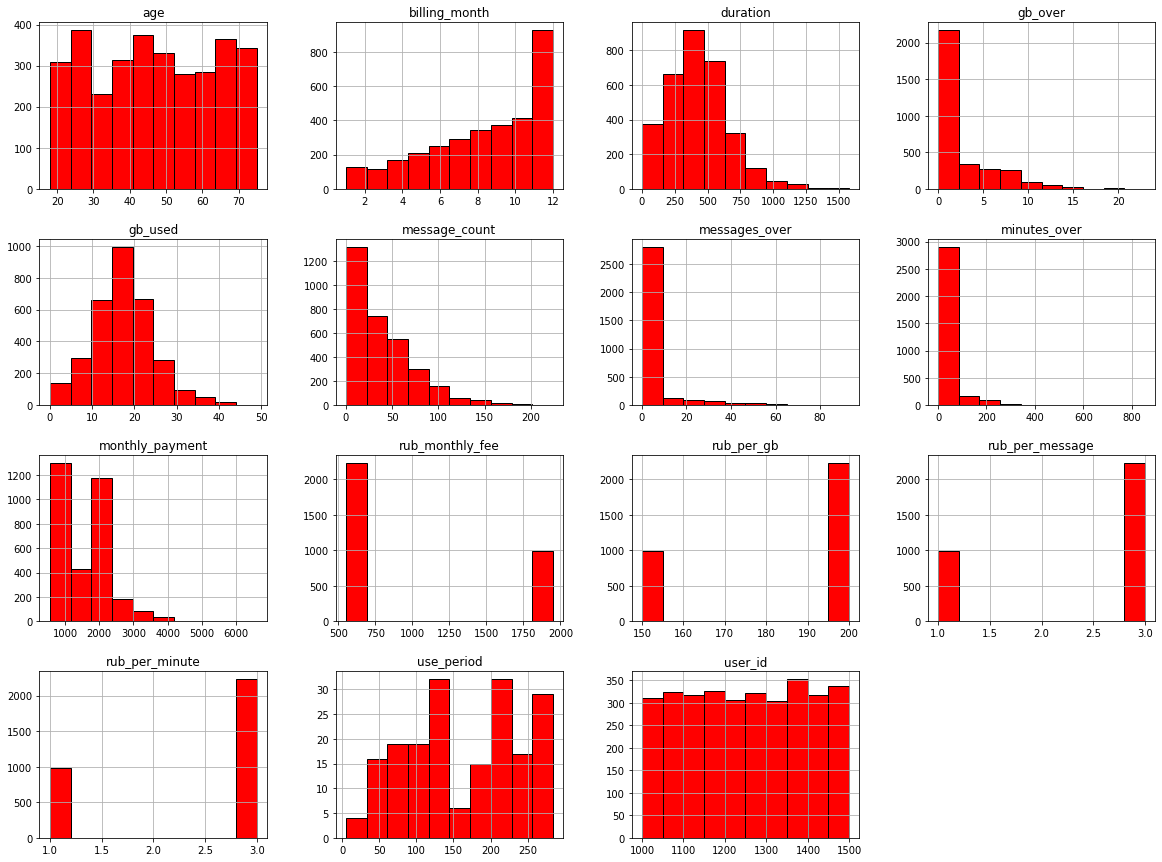

In [21]:
df_final.hist(figsize=(20,15), color='r', edgecolor='black', linewidth=1)
plt.show

На гистограммах видим, что возраст абонентов распределен равномерно с небольшими провалами в интервалах от 30 до 35 лет и от 55 до 65 лет. Меньшее количество абонентов возраста 30-35 объясняется, скорее всего, демографическим кризисом 90-х годов.

На общем распределении длительности звонков видим, что больше половины абонентов обоих тарифов говорят меньше 500 минут в месяц, что остается в рамках тарифа "Смарт". Необходимо рассмотреть длительность звонков абонентов разных тарифов по отдельности.

На общем распределении помесячного интернет-трафика видим, что большинство абонентов тратят больше 15 гигабайт интернета в месяц. Это превышает пакет тарифа "Смарт". Здесь также нужно построить отдельно по тарифам, чтобы оценить, на каком тарифе абоненты чаще выходят за рамки пакета трафика.

На общем распределении использованных сообщений в месяц видим, что очень малая доля абонентов использует больше 100 сообщений в месяц.

Распределение месячной выручки носит биномиальный характер. Судя по всему, пользователи тарифа "Смарт" чаще всего тратят в районе 900 рублей в месяц, а абоненты тарифа "Ультра" почти не выходят за рамки своего тарифа и тратят около 2000 рублей в месяц.

Также биномиальный характер носит и период использования тарифа пользователями, завершившими свои контракты. Около 60% из таких пользователей отсеивается в первые три месяца использования тарифа, остальные же используют свой тариф больше полугода. Нужно подробнее рассмотреть таких пользователей и попробовать найти пути оставить их абонентами компании "Мегалайн".

Распределения превышения пакета минут, СМС и использованного интернет-трафика в данном случае неинформативны, так как в них включены и нулевые значения, что не позволяет оценить, на сколько превышают свои пакеты те, кто их действительно превышает.

Отдельно изучим, как пользователи тарифов используют свои тарифы. Построим распределение длительности звонком для пользователей различных тарифов.

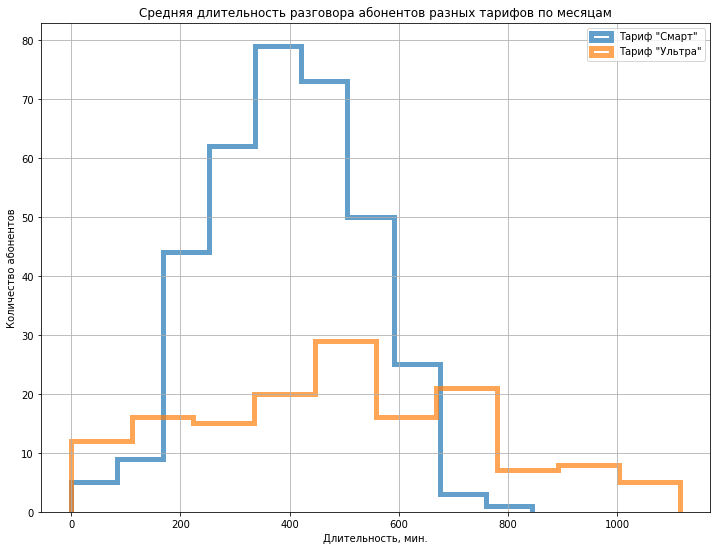

In [22]:
ax = (df_final[df_final['tariff'] == 'smart']
      .groupby(by='user_id')
      .mean()
      .plot(
          kind='hist',
          y='duration',
          histtype='step', 
          linewidth=5, 
          alpha=0.7, 
          grid=True,
          label='Тариф "Смарт"',
          figsize=(12,9)
      ))
(df_final[df_final['tariff'] == 'ultra']
      .groupby(by='user_id')
      .mean()
      .plot(
          kind='hist',
          y='duration',
          histtype='step', 
          linewidth=5, 
          alpha=0.7, 
          grid=True,
          label='Тариф "Ультра"',
          ax=ax
      ))
plt.title('Средняя длительность разговора абонентов разных тарифов по месяцам')
plt.xlabel('Длительность, мин.')
plt.ylabel('Количество абонентов')
plt.show()

Здесь видим, что абоненты тарифа "Ультра" никогда не выходят за рамки своего тарифа- никто не говорит дольше 3000 минут в месяц. С абонентами тарифа "Смарт" ситуация обратная- примерно пятая часть абонентов говорит больше 500 минут. При этом абоненты обоих тарифов в большинстве своем тратят меньше 500 минут. Определим среднее, дисперсию и стандартное отклонение.


In [23]:
smart_mean = df_final[df_final['tariff'] == 'smart']['duration'].mean()
smart_std = np.std(df_final[df_final['tariff'] == 'smart']['duration'])
smart_var = np.var(df_final[df_final['tariff'] == 'smart']['duration'])
ultra_mean = df_final[df_final['tariff'] == 'ultra']['duration'].mean()
ultra_std = np.std(df_final[df_final['tariff'] == 'ultra']['duration'])
ultra_var = np.var(df_final[df_final['tariff'] == 'ultra']['duration'])
print(f'Средняя длительность разговоров абонентов тарифа "Смарт" составляет {smart_mean: .2f} мин. Дисперсия: {smart_var: .2f}. Стандартное отклонение- {smart_std: .2f}')
print(f'Средняя длительность разговоров абонентов тарифа "Ультра" составляет {ultra_mean: .2f} мин. Дисперсия: {ultra_var: .2f}. Стандартное отклонение- {ultra_std: .2f}')

Средняя длительность разговоров абонентов тарифа "Смарт" составляет  394.75 мин. Дисперсия:  32433.76. Стандартное отклонение-  180.09
Средняя длительность разговоров абонентов тарифа "Ультра" составляет  497.04 мин. Дисперсия:  90026.06. Стандартное отклонение-  300.04


Так же изучим расходование трафика абонентами различных тарифов- построим графики распределения, вычислим среднее, дисперсию и стандартное отклонение.

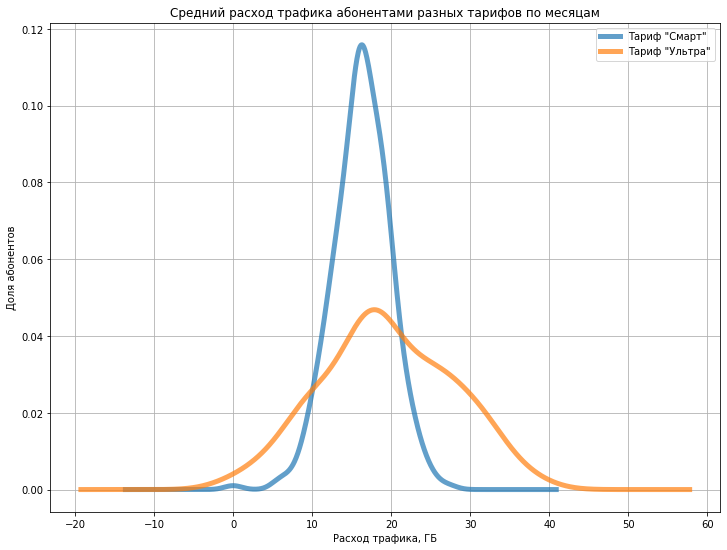

In [24]:
ax = (df_final[df_final['tariff'] == 'smart']
  .groupby(by='user_id')
  .mean()
  .plot(
      kind='kde',
      y='gb_used',

      linewidth=5, 
      alpha=0.7, 
      grid=True,
      label='Тариф "Смарт"',
      figsize=(12,9)
  ))
(df_final[df_final['tariff'] == 'ultra']
      .groupby(by='user_id')
      .mean()
      .plot(
          kind='kde',
          y='gb_used',

          linewidth=5, 
          alpha=0.7, 
          grid=True,
          label='Тариф "Ультра"',
          ax=ax
      ))
plt.title('Средний расход трафика абонентами разных тарифов по месяцам')
plt.xlabel('Расход трафика, ГБ')
plt.ylabel('Доля абонентов')
plt.show()

In [25]:
smart_mean = df_final[df_final['tariff'] == 'smart']['gb_used'].mean()
smart_std = np.std(df_final[df_final['tariff'] == 'smart']['gb_used'])
smart_var = np.var(df_final[df_final['tariff'] == 'smart']['gb_used'])
ultra_mean = df_final[df_final['tariff'] == 'ultra']['gb_used'].mean()
ultra_std = np.std(df_final[df_final['tariff'] == 'ultra']['gb_used'])
ultra_var = np.var(df_final[df_final['tariff'] == 'ultra']['gb_used'])
print(f'Средний объем потербляемого трафика абонентами тарифа "Смарт" составляет {smart_mean: .2f} ГБ. Дисперсия: {smart_var: .2f}. Стандартное отклонение- {smart_std: .2f}')
print(f'Средний объем потербляемого трафика абонентами тарифа "Ультра" составляет {ultra_mean: .2f} ГБ. Дисперсия: {ultra_var: .2f}. Стандартное отклонение- {ultra_std: .2f}')

Средний объем потербляемого трафика абонентами тарифа "Смарт" составляет  16.32 ГБ. Дисперсия:  33.12. Стандартное отклонение-  5.75
Средний объем потербляемого трафика абонентами тарифа "Ультра" составляет  19.47 ГБ. Дисперсия:  97.28. Стандартное отклонение-  9.86


Распределение по абонентам тарифа "Смарт" имеет явный пик около 16 гигабайт в месяц- многие абоненты данного тарифа докупают дополнительные пакеты трафика. Абоненты тарифа "Ультра" в среднем тратят 19,5 гигабайт, однако многие из абонентов "Ультры" тратят даже больше своего пакета- до 40 гигабайт в месяц.

Изучим использование абонентами различных тарифов СМС-сообщений.

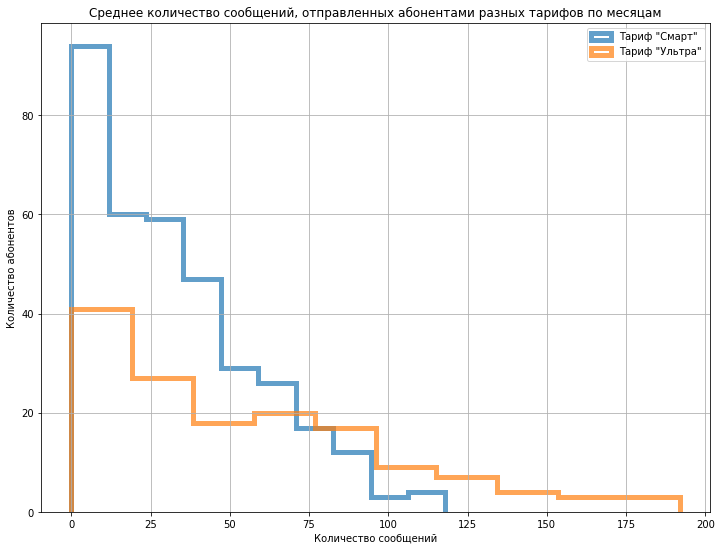

In [26]:
ax = (df_final[df_final['tariff'] == 'smart']
      .groupby(by='user_id')
      .mean()
      .plot(
          kind='hist',
          y='message_count',
          histtype='step', 
          linewidth=5, 
          alpha=0.7, 
          grid=True,
          label='Тариф "Смарт"',
          figsize=(12,9)
      ))
(df_final[df_final['tariff'] == 'ultra']
      .groupby(by='user_id')
      .mean()
      .plot(
          kind='hist',
          y='message_count',
          histtype='step', 
          linewidth=5, 
          alpha=0.7, 
          grid=True,
          label='Тариф "Ультра"',
          ax=ax
      ))
plt.title('Среднее количество сообщений, отправленных абонентами разных тарифов по месяцам')
plt.xlabel('Количество сообщений')
plt.ylabel('Количество абонентов')
plt.show()

In [27]:
smart_mean = df_final[df_final['tariff'] == 'smart']['message_count'].mean()
smart_std = np.std(df_final[df_final['tariff'] == 'smart']['message_count'])
smart_var = np.var(df_final[df_final['tariff'] == 'smart']['message_count'])
ultra_mean = df_final[df_final['tariff'] == 'ultra']['message_count'].mean()
ultra_std = np.std(df_final[df_final['tariff'] == 'ultra']['message_count'])
ultra_var = np.var(df_final[df_final['tariff'] == 'ultra']['message_count'])
print(f'Среднее количество сообщений, отправленных абонентами тарифа "Смарт" в месяц составляет {smart_mean: .2f}. Дисперсия: {smart_var: .2f}. Стандартное отклонение- {smart_std: .2f}')
print(f'Среднее количество сообщений, отправленных абонентами тарифа "Ультра" в месяц составляет {ultra_mean: .2f}. Дисперсия: {ultra_var: .2f}. Стандартное отклонение- {ultra_std: .2f}')

Среднее количество сообщений, отправленных абонентами тарифа "Смарт" в месяц составляет  33.37. Дисперсия:  796.60. Стандартное отклонение-  28.22
Среднее количество сообщений, отправленных абонентами тарифа "Ультра" в месяц составляет  49.31. Дисперсия:  2283.10. Стандартное отклонение-  47.78


Примерно пятая чать абонентов "Смарта" отправляет больше 50 сообщений в месяц, превышая пакет своего тарифа. Никто из абонентов тарифа "Ультра" не выходит за рамки своего пакета.

Суммируя всё вышесказанное, можем сделать промежуточный вывод: абоненты тарифа "Смарт" чаще выходят за рамки своего тарифа. Подавляющее большинство абонентов тратит больше интернет-трафика, чем дается в тарифе, и по 20% абонентов тратят больше минут и сообщений. При этом абоненты тарифа "Ультра" редко тратят лишние минуты разговора и сообщения, но многие из них тратят больше интернет-трафика.

Далее определим, сколько суммарно абонентов тарифов "Смарт" и "Ультра". В окончательной таблице идет разбивка по месяцам для каждого пользователя, поэтому для расчета общего количества пользователей каждого тарифа проще воспользоваться датасетом df_users.

In [28]:
df_users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

351 пользователь тарифа "Смарт" и 149- "Ультра". Это логично, так как тариф смарт почти в 4 раза дешевле, поэтому более популярен. 

Далее рассмотрим, сколько тратят пользователи в среднем за месяц. В отдельной таблице рассчитаем среднюю выручку с каждого пользователя и построим гистограммы для каждого тарифа по отдельности.

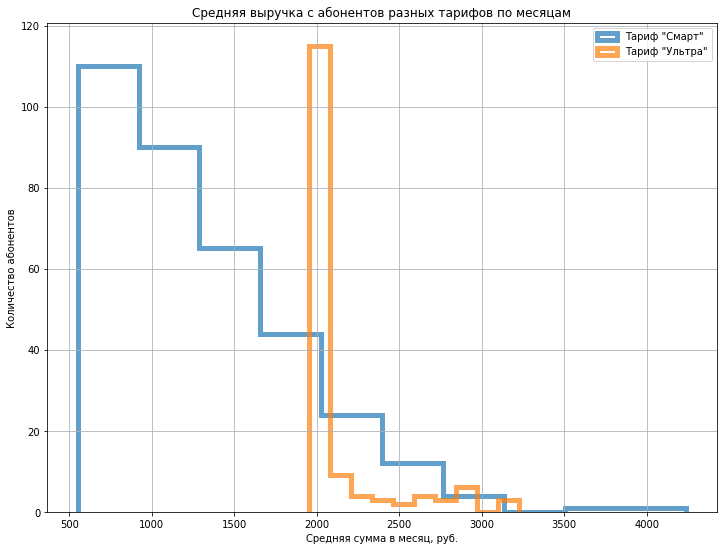

In [29]:
ax = (df_final[df_final['tariff'] == 'smart']
      .groupby(by='user_id')
      .mean()
      .plot(
          kind='hist',
          y='monthly_payment',
          histtype='step', 
          linewidth=5, 
          alpha=0.7, 
          grid=True,
          label='Тариф "Смарт"',
          figsize=(12,9)
      ))
(df_final[df_final['tariff'] == 'ultra']
      .groupby(by='user_id')
      .mean()
      .plot(
          kind='hist',
          y='monthly_payment',
          histtype='step', 
          linewidth=5, 
          alpha=0.7, 
          grid=True,
          label='Тариф "Ультра"',
          ax=ax
      ))
plt.title('Средняя выручка с абонентов разных тарифов по месяцам')
plt.xlabel('Средняя сумма в месяц, руб.')
plt.ylabel('Количество абонентов')
plt.show()

Генеральные совокупности для обоих тарифов не имеют вид нормального распределения, так как в тарифах существует минимальный размер ежемесячной оплаты и большое количество абонентов не превышают этот размер или превышают его незначительно. Оба распределения смещены влево. По распределению видим, что пользователи тарифа "Ультра" довольно редко сильно превышают абонентскую плату за месяц. Абоненты тарифа "Смарт" ведут себя иначе- значительное большинство пользователей платит в месяц больше 1000 рублей при абонентской плате в 550 рублей, то есть переплачивают в два раза. Около 10% абонентов "Смарта" при этом платят больше 1950 рублей- то есть абонентской платы тарифа "Ультра". Для пользователей обоих тарифов вычислим среднее значение и стандартное отклонение среднемесячной выручки.

In [30]:
smart_mean = df_final[df_final['tariff'] == 'smart']['monthly_payment'].mean()
smart_std = np.std(df_final[df_final['tariff'] == 'smart']['monthly_payment'])
smart_var = np.var(df_final[df_final['tariff'] == 'smart']['monthly_payment'])
ultra_mean = df_final[df_final['tariff'] == 'ultra']['monthly_payment'].mean()
ultra_std = np.std(df_final[df_final['tariff'] == 'ultra']['monthly_payment'])
ultra_var = np.var(df_final[df_final['tariff'] == 'ultra']['monthly_payment'])
print(f'Средняя выручка абонентов тарифа "Смарт" составляет {smart_mean: .2f} руб. Дисперсия: {smart_var: .2f}. Стандартное отклонение- {smart_std: .2f}')
print(f'Средняя выручка абонентов тарифа "Ультра" составляет {ultra_mean: .2f} руб. Дисперсия: {ultra_var: .2f}. Стандартное отклонение- {ultra_std: .2f}')

Средняя выручка абонентов тарифа "Смарт" составляет  1257.27 руб. Дисперсия:  641114.91. Стандартное отклонение-  800.70
Средняя выручка абонентов тарифа "Ультра" составляет  2070.03 руб. Дисперсия:  141244.32. Стандартное отклонение-  375.82


Средняя выручка абонентов "Смарта" более чем в 2 раза превосходит размер абонентской платы, в то время как выручка абонентов "Ультры" больше абонентской платы всего на 100 рублей (чуть больше 5%). Чтобы сравнить выручку абонентов по тарифам, сформулируем нулевую гипотезу: выручка пользователей тарифов "Смарт" и "Ультра" равна. Альтернативную гипотезу сформулируем односторонней: выручка пользователей тарифа "Ультра" выше выручки пользователей тарифа "Смарт". Уровень статистической значимости установим равным 0,03.

In [31]:
# вычислим для каждого тарифа среднемесячную выручку по пользователям и представим в виде списков
smart_payment = df_final[df_final['tariff'] == 'smart'].groupby(by='user_id').mean()
smart_payment = list(smart_payment['monthly_payment'])
ultra_payment = df_final[df_final['tariff'] == 'ultra'].groupby(by='user_id').mean()
ultra_payment = list(ultra_payment['monthly_payment'])

# проверим нулевую гипотезу

results = st.ttest_ind(smart_payment, ultra_payment, equal_var = False)
alpha = 0.03
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 4.46525380299289e-65
Отвергаем нулевую гипотезу


p-значение настолько мало, что нулевая гипотеза отвергается практически при любых общепринятых значениях уровня значимости. 

Проверим, как много абонентов тарифа "Смарт" тратят больше 1950 рублей- абонентской платы тарифа "Ультра".

In [32]:
smart_more_ultra = 0
for i in range(len(smart_payment)):
    if smart_payment[i] > 1950:
        smart_more_ultra += 1
print(f'Количество пользователей тарифа "Смарт", расходующих в месяц больше 1950 рублей составляет {smart_more_ultra / len(smart_payment): .1%}')

Количество пользователей тарифа "Смарт", расходующих в месяц больше 1950 рублей составляет  13.1%


Тратят больше 1950 рублей 13% абонентов "Смарта". Проверим, сколько из них превышают лимиты тарифа "Ультра". 

In [33]:
smart_comparison = pd.DataFrame(df_final[df_final['tariff'] == 'smart'].groupby(by='user_id').mean())
print(f'{len(smart_comparison[smart_comparison["monthly_payment"] == 550])} пользователей тарифа "Смарт" не выходят за рамки выделенных пакетов')
smart_within_ultra = len(smart_comparison.query('monthly_payment > 1950 and duration <= 3000 and gb_used <= 30 and message_count <= 1000')) 
print(f'{smart_within_ultra} пользователей тарифа "Смарт", которые тратят больше 1950 рублей, используют минут, сообщений и трафика меньше, чем в тарифе "Ультра"')
print(f'Доля таких абонентов тарифа "Смарт" составляет {smart_within_ultra / len(smart_payment): .1%}')

18 пользователей тарифа "Смарт" не выходят за рамки выделенных пакетов
46 пользователей тарифа "Смарт", которые тратят больше 1950 рублей, используют минут, сообщений и трафика меньше, чем в тарифе "Ультра"
Доля таких абонентов тарифа "Смарт" составляет  13.1%


46 из 351 пользователей тарифа "Смарт" тратят больше, чем абонентская плата тарифа "Ультра", находясь при этом в рамках данного тарифа. Это довольно много пользователей- почти каждый десятый в общей выборке и почти треть от общего количества абонентов тарифа "Ультра". Для этих 46 абонентов было бы выгоднее использовать тариф "Ультра", но для компании было бы выгоднее оставить их на тарифе "Смарт", так как лишние минуты, сообщения и гигабайты в данном тарифе дороже, а их пакеты- меньше. 

Теперь решим обратную задачу: проверим, как много абонентов "Ультры" тратят больше 1950 рублей и используют пакетов меньше, чем в "Смарте". Для них было бы выгоднее перейти на "Смарт", а для компании- оставить их на "Ультре".

In [34]:
ultra_within = 0
for i in range(len(ultra_payment)):
    if ultra_payment[i] == 1950:
        ultra_within += 1
print(f'Количество пользователей тарифа "Ультра", не расходующих больше абонентской платы составляет {ultra_within / len(ultra_payment): .1%}')

Количество пользователей тарифа "Ультра", не расходующих больше абонентской платы составляет  71.1%


7 из 10 абонентов "Ультры" никогда не выходят за рамки тарифа. Проверим, тратят ли они пакеты больше, чем "Смарте".

In [35]:
ultra_comparison = pd.DataFrame(df_final[df_final['tariff'] == 'ultra'].groupby(by='user_id').mean())
ultra_less_smart = len(ultra_comparison.query('monthly_payment == 1950 and duration <= 500 and gb_used <= 15 and message_count <= 50')) 
print(f'{ultra_less_smart} пользователей тарифа "Ультра" никогда не выходят за рамки своего тарифа и используют минут, сообщений и трафика меньше, чем в тарифе "Смарт"')
print(f'Доля таких абонентов тарифа "Ультра" составляет {ultra_less_smart / len(ultra_payment): .1%}')

11 пользователей тарифа "Ультра" никогда не выходят за рамки своего тарифа и используют минут, сообщений и трафика меньше, чем в тарифе "Смарт"
Доля таких абонентов тарифа "Ультра" составляет  7.4%


Всего 2% от общей выборки, но каждый десятый из числа не выходящих за рамки тарифа "Ультра" абонент тратит пакетов меньше, чем включено в тариф "Смарт". Им было бы выгоднее перейти на тариф "Смарт", но для компании было бы выгоднее оставить их на тарифе "Ультра". 

Отдельно рассчитаем, сколько приносит каждый тариф в год- сложим выручку по всем пользователям и выведем на экран.

In [36]:
df_final.groupby(by='tariff')['monthly_payment'].sum()

tariff
smart    2803715
ultra    2041050
Name: monthly_payment, dtype: int32

Тариф "Смарт" приносит почти на 40% больше ежегодно. Это предсказуемо- абонентов тарифа "Смарт" почти в 2,5 раза больше.

Здесь можем сделать предварительный вывод: благодаря низкой цене тариф "Смарт" популярнее тарифа "Ультра"- абонентов "Смарта" в 2,3 раза больше. Тариф "Смарт" приносит 2,8 миллиона рублей в год. В среднем его абоненты тратят 1257 рублей в месяц, но 13% из них тратят больше, чем стоит тариф "Ультра", и все из них остаются в рамках этого тарифа, т.е. при переходе на тариф "Ультра" они бы платили 1950 рублей в месяц. Всего 18 из 351 абонента не превышают выделенных пакетов в месяц. Тариф "Ультра" приносит 2 миллиона рублей в год. В среднем его абоненты тратят 2070 рублей в месяц, но 7% из них могли бы перейти на "Смарт" и платить только абонентскую плату, так как не превышают лимитов даже этого тарифа, т.е. при переходе на "Смарт" они бы платили 550 рублей в месяц вместо 1950. В тарифе "Ультра" 71% пользователей не превышают выделенных пакетов,  оставаясь в рамках тарифа. 

Пока нельзя однозначно сказать, какой тариф лучше. На данном этапе точно можно сказать, что для компании было бы выгоднее оставить на тарифе "Смарт" тех пользователей, которые тратят больше, чем абонентская плата тарифа "Ультра", и оставить на тарифе "Ультра" тех пользователей, звонки, сообщения и трафик которых остаются в рамках тарифа "Смарт"- они нагружают инфраструктуру компании меньше, а тратят больше. При этом стоит учитывать, что тариф "Смарт" привлекательнее для пользователей, не склонных отслеживать свою активность ежемесячно, за счет своей цены, поэтому перевести абонента с тарифа "Смарт" на "Ультра" будет сложнее.

Посчитаем ожидаемую прибыль от абонентов, если бы все из них использовали тариф "Смарт" или тариф "Ультра". Для этого введем дополнительные столбцы, в которых посчитаем выручку с абонента, если бы он использовал один из этих двух тарифов.

In [37]:
df_final_mean = pd.DataFrame(df_final.groupby(by='user_id').mean())
df_final_mean
df_final_mean['by_smart'] = (550 + 
                             3 * (np.ceil(df_final_mean['duration']) - 500 + abs(np.ceil(df_final_mean['duration']) - 500)) / 2 + 
                             3 * (np.ceil(df_final_mean['message_count']) - 50 + abs(np.ceil(df_final_mean['message_count']) - 50)) / 2 +
                             200 * (np.ceil(df_final_mean['gb_used']) - 15 + abs(np.ceil(df_final_mean['gb_used']) - 15)) / 2)
df_final_mean['by_ultra'] = (1950 + 
                             1 * (np.ceil(df_final_mean['duration']) - 3000 + abs(np.ceil(df_final_mean['duration']) - 3000)) / 2 + 
                             1 * (np.ceil(df_final_mean['message_count']) - 1000 + abs(np.ceil(df_final_mean['message_count']) - 1000)) / 2 +
                             150 * (np.ceil(df_final_mean['gb_used']) - 30 + abs(np.ceil(df_final_mean['gb_used']) - 30)) / 2)
by_smart = df_final_mean['by_smart'].sum()
by_ultra = df_final_mean['by_ultra'].sum()
monthly_now = df_final_mean['monthly_payment'].sum()
print(f'Ожидаемая выручка в месяц с пользователей тарифа "Смарт" составит {by_smart} руб.')
print(f'Ожидаемая выручка в месяц с пользователей тарифа "Ультра" составит {by_ultra} руб.')
print(f'Текущая выручка компании в месяц составляет в среднем {monthly_now: .1f} руб.')

Ожидаемая выручка в месяц с пользователей тарифа "Смарт" составит 710500.0 руб.
Ожидаемая выручка в месяц с пользователей тарифа "Ультра" составит 984150.0 руб.
Текущая выручка компании в месяц составляет в среднем  763114.7 руб.


Если перевести всех пользователей на тариф "Ультра", компания заработает на 274 тысячи ежемесячно больше, чем если перевести всех пользователей на тариф "Смарт" и на 219 тысяч больше текущей ежемесячной выручки. Но при попытке перевести абонентов на более дорогой тариф есть риск, что они сменят оператора. Перевести абонентов на тариф дешевле проще, однако для компании было бы выгоднее перевести абонентов на тариф дешевле таким образом, чтобы они начали тратить больше. 

Выведем на экран всех абонентов тарифа "Смарт", которые превышают хотя бы один из пакетов- звонки, сообщения или интернет-трафик, но тратят меньше 1950 рублей, и посмотрим, сколько они в среднем тратят в месяц. Таких абонентов будет проще переубедить перейти на более дорогой тариф с большим размером пакетов.

Text(0, 0.5, 'Количество абонентов')

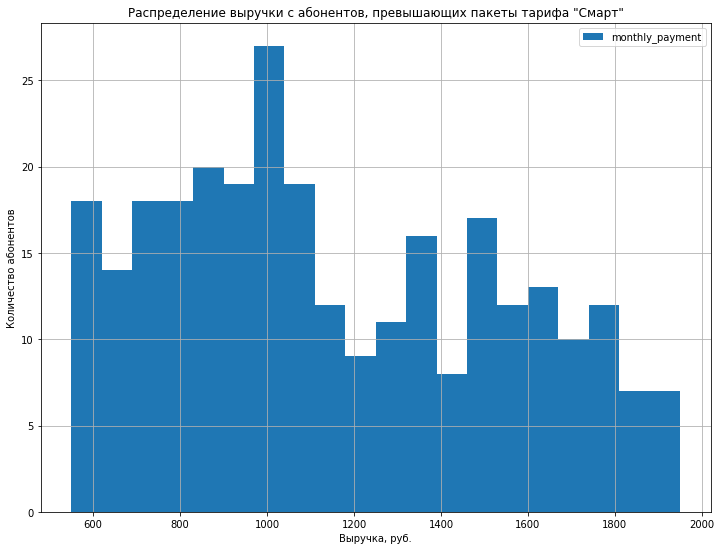

In [38]:
smart_comparison.query('monthly_payment < 1950 and (minutes_over > 0 or messages_over > 0 or gb_over > 0)').plot(kind='hist', y='monthly_payment', bins=20, range=(550, 1950), grid=True, figsize=(12,9))
plt.title('Распределение выручки с абонентов, превышающих пакеты тарифа "Смарт"')
plt.xlabel('Выручка, руб.')
plt.ylabel('Количество абонентов')

Распределение выручки носит характер, близкий к биномиальному, с двумя характерными пиками- в районе 1000 рублей и в районе 1500 рублей. Абонентам, которые превышают лимиты тарифа "Смарт" и платят больше 1500 рублей можно предложить перейти на тариф "Ультра", а в качестве аргумента привести больший объем пакетов, включенных в тариф. 

Также рассмотрим, меняется ли поведение абонентов "Смарта" в течение года- тратят ли они одинаково в каждом месяце или же траты абонентов меняются в течение года. Построим диаграммы размаха для абонентов тарифа "Смарт" по месяцам оплаты.

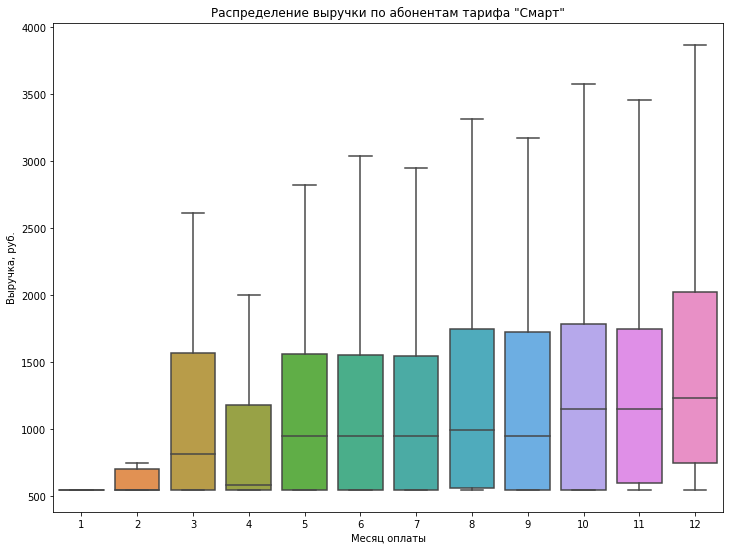

In [39]:
plt.figure(figsize=(12,9))
sns.boxplot(x='billing_month', y='monthly_payment', data=df_final[df_final['tariff'] == 'smart'], showfliers=False)
plt.title('Распределение выручки по абонентам тарифа "Смарт"')
plt.xlabel('Месяц оплаты')
plt.ylabel('Выручка, руб.')
plt.show()

Из анализа диаграмм размаха по месяцам видим, что абоненты "Смарта" остаются в пределах своих пакетов в январе и почти не выходят за границы пакетов в феврале. Средняя выручка близка к абонентской плате тарифа в апреле. В марте и с мая по сентябрь наблюдаем примерно одинаковую среднюю выручку и верхний квартиль выручки по абонентам, но видим постоянный рост верхней границы, что приводит к большей средней выручке с октября по декабрь. Следовательно, с октября по декабрь абоненты тарифа "Смарт" тратят больше и именно в эти месяцы нужно предлагать абонентам, которые превышают свои пакеты и тратят от 1500 до 1950 рублей, перейти на тариф "Ультра".

Для более эффективного продвижения тарифа "Ультра" в разных возрастных категориях изучим, как меняется поведение абонентов тарифа "Смарт" в различных возрастных категориях. Для этого построим диаграммы размаха по длительности звонков, количеству сообщений и использованному трафику в каждой возрастной категории.

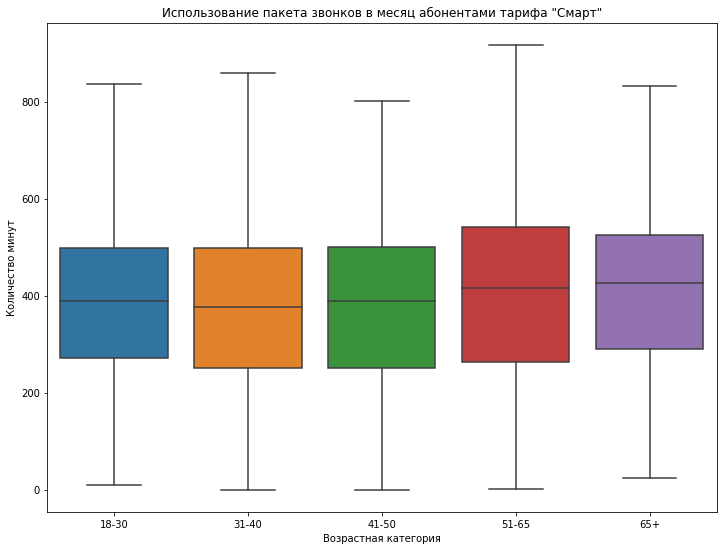

In [40]:
plt.figure(figsize=(12,9))
sns.boxplot(x='age_group', y='duration', data=df_final[df_final['tariff'] == 'smart'], showfliers=False)
plt.title('Использование пакета звонков в месяц абонентами тарифа "Смарт"')
plt.xlabel('Возрастная категория')
plt.ylabel('Количество минут')
plt.show()

Абоненты во всех возрастных категориях используют примерно одинаковое количество минут в месяц- около 400. Это не превышает установленный лимит для тарифа "Смарт" в 500 минут. Верхний квартиль в возрастных категориях старше 50 лет незначительно превышает установленный лимит. Предлагая переход на тариф "Ультра" абонентам тарифа "Смарт" старше 50 лет можно аргументировать большим пакетом минут.

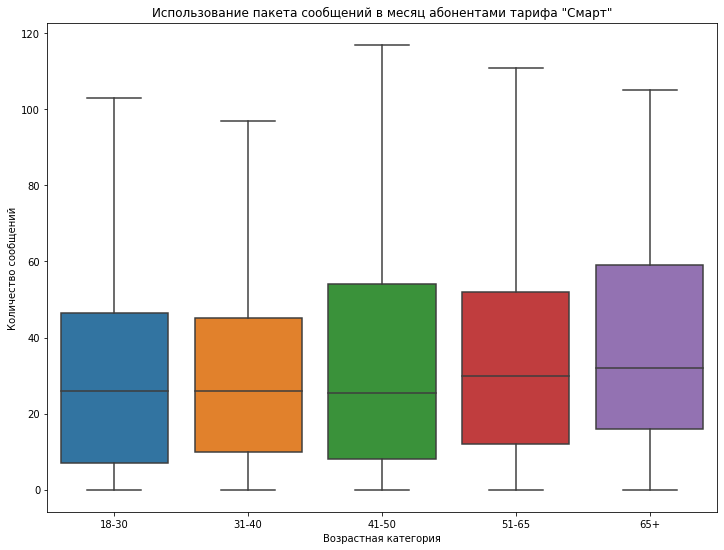

In [41]:
plt.figure(figsize=(12,9))
sns.boxplot(x='age_group', y='message_count', data=df_final[df_final['tariff'] == 'smart'], showfliers=False)
plt.title('Использование пакета сообщений в месяц абонентами тарифа "Смарт"')
plt.xlabel('Возрастная категория')
plt.ylabel('Количество сообщений')
plt.show()

В среднем абоненты "Смарта" во всех возрастных категориях используют не больше 300 сообщений в месяц, что также не превышает установленный лимит. Однако верхний квартиль и верхняя граница в возрастных категориях старше 40 лет выше, чем в возрастных категориях младше 40. Предлагая переход на тариф "Ультра" для пользователей "Смарта" старше 40 можно также аргументировать и большим пакетом сообщений в тарифе.

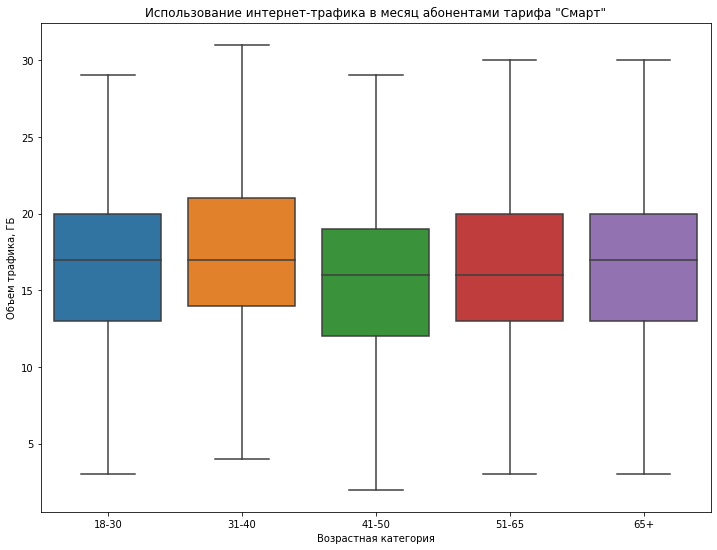

In [42]:
plt.figure(figsize=(12,9))
sns.boxplot(x='age_group', y='gb_used', data=df_final[df_final['tariff'] == 'smart'], showfliers=False)
plt.title('Использование интернет-трафика в месяц абонентами тарифа "Смарт"')
plt.xlabel('Возрастная категория')
plt.ylabel('Объем трафика, ГБ')
plt.show()

Абоненты младше 40 в большинстве своем используют больше трафика, чем дается в тарифе "Смарт"- нижний квартиль в этих категориях приближается к 15 гигабайтам. Пользователи от 41 до 65 используют меньше трафика и в среднем незначительно превышают лимиты тарифа. Пользователи старше 65 тоже используют больше трафика, чем есть в тарифе.

Промежуточный итог можно сформулировать так: каждый шестой пользователь тарифа "Смарт" тратит от 1500 до 1950 рублей. Выгоднее было бы перевести их на тариф "Ультра". Предлагая таким пользователям перейти на тариф "Ультра" стоит разделить их на возрастные категории и в каждой категории приводить свою аргументацию. Так, для абонентов до 40 лет основной упор следует делать на повышенный объем интернет-трафика, в категории от 40 до 65 лет- на больший пакет минут и сообщений, а в возрасте старше 65 лет- на все пакеты сразу. При этом наиболее активно поменять тариф следует предлагать с октября по декабрь- в жто время пользователи тратят больше и убедить их перейти на более дорогой тариф будет проще.

Теперь проанализируем пользователей из разных городов. Одной из целей проекта является сравнение трат пользователей из Москвы и из других городов. Нулевую гипотезу сформулируем так: пользователи из Москвы тратят столько же, сколько и пользователи из других городов России. Альтернативная гипотеза: пользователи из Москвы и из других городов тратят по-разному. Создадим два списка- список с тратами пользователей из Москвы и из других городов, после чего проверим нулевую гипотезу.

In [43]:
moscow_users_payment = list(df_final[df_final['city'] == 'Москва']['monthly_payment'])
non_moscow_users_payment = list(df_final[df_final['city'] != 'Москва']['monthly_payment'])
results = st.ttest_ind(moscow_users_payment, non_moscow_users_payment, equal_var = False)
alpha = 0.03
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.46183914667656145
Не получилось отвергнуть нулевую гипотезу


Теперь рассчитаем среднее, дисперсию и стандартное отклонение для пользователей из Москвы и из других городов.

In [44]:
moscow_mean = df_final[df_final['city'] == 'Москва']['monthly_payment'].mean()
moscow_std = np.std(df_final[df_final['city'] == 'Москва']['monthly_payment'])
moscow_var = np.var(df_final[df_final['city'] == 'Москва']['monthly_payment'])
non_moscow_mean = df_final[df_final['city'] != 'Москва']['monthly_payment'].mean()
non_moscow_std = np.std(df_final[df_final['city'] != 'Москва']['monthly_payment'])
non_moscow_var = np.var(df_final[df_final['city'] != 'Москва']['monthly_payment'])
print(f'Средняя выручка абонентов тарифа "Смарт" составляет {moscow_mean: .2f} руб. Дисперсия: {moscow_var: .2f}. Стандартное отклонение- {moscow_std: .2f}')
print(f'Средняя выручка абонентов тарифа "Ультра" составляет {non_moscow_mean: .2f} руб. Дисперсия: {non_moscow_var: .2f}. Стандартное отклонение- {non_moscow_std: .2f}')

Средняя выручка абонентов тарифа "Смарт" составляет  1526.84 руб. Дисперсия:  561911.03. Стандартное отклонение-  749.61
Средняя выручка абонентов тарифа "Ультра" составляет  1501.68 руб. Дисперсия:  643742.46. Стандартное отклонение-  802.34


Среднее значение и стандартное отклонение для пользователей из Москвы и пользователей из других городов близки по значению. На данном этапе можно сделать вывод, что пользователи по всей России тратят примерно одинаково на связь. Чтобы в этом убедиться построим диаграммы размаха, группируя пользователей из Москвы и из других городов для пакетов минут, сообщений и трафика.

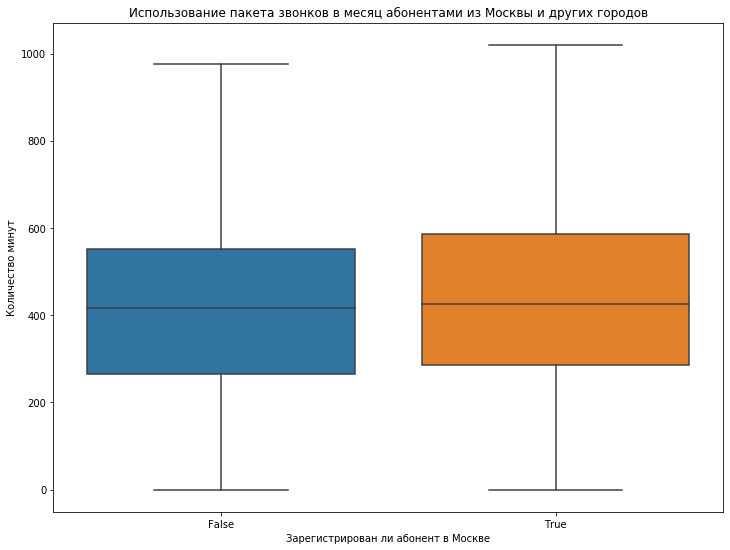

In [45]:
df_final['is_moscow'] = (df_final['city'] == 'Москва')
df_final
plt.figure(figsize=(12,9))
sns.boxplot(x='is_moscow', y='duration', data=df_final, showfliers=False)
plt.title('Использование пакета звонков в месяц абонентами из Москвы и других городов')
plt.xlabel('Зарегистрирован ли абонент в Москве')
plt.ylabel('Количество минут')
plt.show()

Абоненты из Москвы тратят немного больше минут, чем абоненты из других городов.

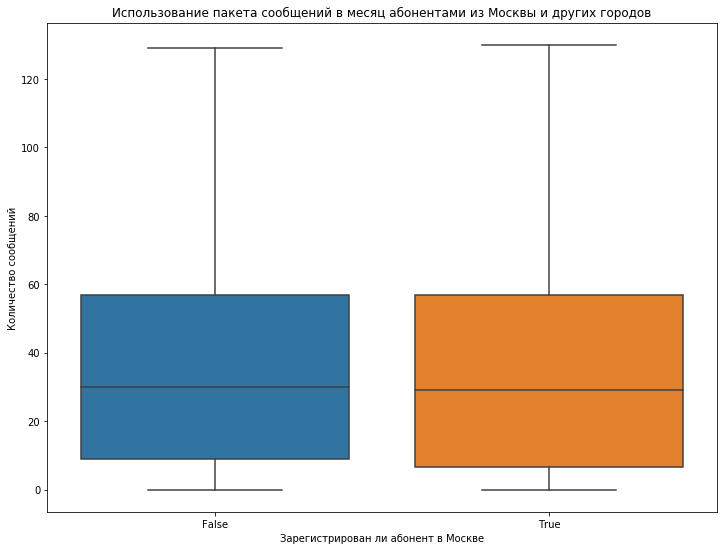

In [46]:
df_final['is_moscow'] = (df_final['city'] == 'Москва')
df_final
plt.figure(figsize=(12,9))
sns.boxplot(x='is_moscow', y='message_count', data=df_final, showfliers=False)
plt.title('Использование пакета сообщений в месяц абонентами из Москвы и других городов')
plt.xlabel('Зарегистрирован ли абонент в Москве')
plt.ylabel('Количество сообщений')
plt.show()

Абоненты из Москвы и из других городов тратят одинаковое количество сообщений в месяц.

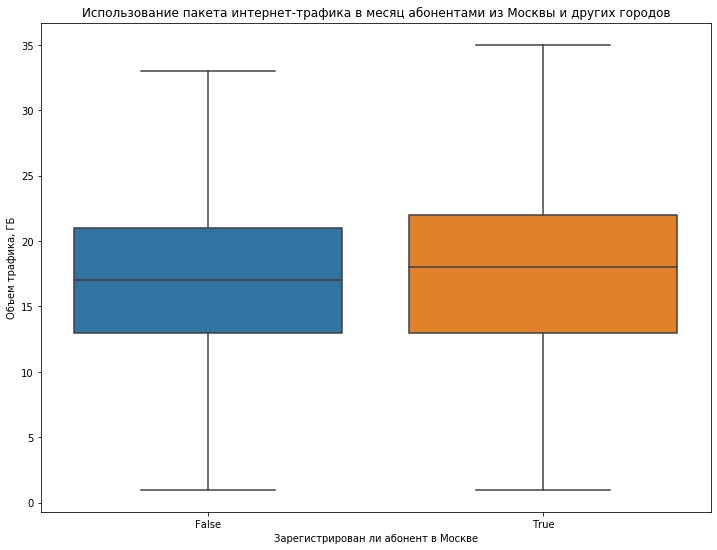

In [47]:
df_final['is_moscow'] = (df_final['city'] == 'Москва')
df_final
plt.figure(figsize=(12,9))
sns.boxplot(x='is_moscow', y='gb_used', data=df_final, showfliers=False)
plt.title('Использование пакета интернет-трафика в месяц абонентами из Москвы и других городов')
plt.xlabel('Зарегистрирован ли абонент в Москве')
plt.ylabel('Объем трафика, ГБ')
plt.show()

Абоненты из Москвы тратят немного больше трафика в месяц. 

В целом, небольшими объемами превышения трафика и использованных минут в месяц абонентами из Москвы по сравнению с абонентами из других городов можно объяснить незначительное превышение средней выручки. Но нельзя сказать, что абоненты из Москвы в чем-то ведут себя иначе по сравнению с абонентами из других городов.

Далее проанализируем абонентов, которые прекратили использование тарифа. Для начала выведем на экран количество абонентов в каждом тарифе.

In [48]:
df_users[df_users['churn_date'].isna() == False]['tariff'].value_counts()

smart    23
ultra    15
Name: tariff, dtype: int64

Если общее распределение абонентов тарифов "Смарт" и "Ультра" составляет примерно 2,35:1, то распределение среди абонентов, прекративших использование, составляет уже 1,53:1. Это говорит нам о том, что от тарифа "Ультра" отказываются чаще, чем от тарифа "Смарт". Таких абонентов тарифа "Ультра" всего 15, поэтому можем вывести их расходы на экран и проанализировать.

In [49]:
ultra_churn = df_final.query('tariff == "ultra" and use_period > 0').groupby(by='user_id').mean()
ultra_churn

,age,billing_month,duration,message_count,gb_used,messages_over,gb_over,minutes_over,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,monthly_payment,use_period,is_moscow
user_id,,,,,,,,,,,,,,,
1019,63,7.5,335.8,18.3,16.0,0.0,0.0,0.0,1950,150,1,1,"1,950.0",142.0,False
1050,44,8.0,170.2,32.8,20.2,0.0,1.0,0.0,1950,150,1,1,"2,100.0",109.0,False
1063,45,8.0,712.0,0.0,17.2,0.0,0.0,0.0,1950,150,1,1,"1,950.0",243.0,False
1090,54,11.0,362.7,14.0,12.3,0.0,0.0,0.0,1950,150,1,1,"1,950.0",53.0,False
1128,51,12.0,0.0,0.0,0.0,0.0,0.0,0.0,1950,150,1,1,"1,950.0",8.0,False
1201,32,10.0,668.6,0.0,8.0,0.0,0.0,0.0,1950,150,1,1,"1,950.0",119.0,True
1254,75,4.5,493.6,0.0,21.4,0.0,0.0,0.0,1950,150,1,1,"1,950.0",225.0,True
1255,40,5.5,192.0,0.0,31.1,0.0,6.6,0.0,1950,150,1,1,"2,943.8",195.0,False
1265,24,8.0,517.6,57.6,25.0,0.0,4.4,0.0,1950,150,1,1,"2,610.0",102.0,False


Почти все абоненты не превышали лимиты тарифа "Ультра", а большинство из них пользовалось преимущественно интернетом, звонками и сообщениями не превышая лимиты, установленные даже для тарифа "Смарт". При этом многие из них использовали тариф дольше трех месяцев. Судя по всему, абоненты просто отказались от тарифа "Ультра" в пользу более дешевого тарифа. Это обстоятельство стоит учесть для тех 7% пользователей тарифа "Ультра", которые тратят пакеты меньше, чем даются в тарифе "Смарт"- они могут сменить тариф и уйти к другому оператору. Следует предусмотреть меры, чтобы оставить их на тарифе "Ультра" или хотя бы перевести на тариф "Смарт", чтобы не потерять их вообще.

Так же проанализируем абонентов тарифа "Смарт", прекративших использование.

In [50]:
smart_churn = df_final.query('tariff == "smart" and use_period > 0').groupby(by='user_id').mean()
smart_churn

,age,billing_month,duration,message_count,gb_used,messages_over,gb_over,minutes_over,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,monthly_payment,use_period,is_moscow
user_id,,,,,,,,,,,,,,,
1020,59,11.0,394.7,12.7,11.0,0.0,1.0,46.0,550,200,3,3,888.0,57.0,False
1034,66,9.5,425.8,25.5,12.8,0.0,1.8,53.8,550,200,3,3,"1,061.2",87.0,False
1051,37,7.5,274.8,2.5,14.0,0.0,2.3,0.0,550,200,3,3,"1,016.7",139.0,True
1056,73,7.0,303.0,34.3,14.1,0.0,1.6,0.0,550,200,3,3,864.3,184.0,False
1062,24,11.5,332.0,13.0,6.0,0.0,0.0,0.0,550,200,3,3,550.0,23.0,True
1064,55,7.5,337.7,35.1,18.5,0.0,4.4,0.0,550,200,3,3,"1,430.0",284.0,False
1065,53,7.5,442.8,59.4,21.9,12.6,7.8,8.5,550,200,3,3,"2,173.3",276.0,True
1071,20,4.5,282.6,16.6,16.8,0.0,1.9,0.0,550,200,3,3,925.0,234.0,False
1161,65,9.0,274.0,33.6,15.6,0.0,2.6,0.0,550,200,3,3,"1,070.0",127.0,False


Здесь абоненты разделились на две группы. Первая из них- около половины пользователей- не тратят больше абонентской платы, используют чуть больше половины выделенных минут и интернет-трафика и почти не используют сообщения. Все они использовали тариф "Смарт" недолго- не более трех месяцев. Скорее всего, эти абоненты нашли подходящие им тарифы дешевле у других операторов связи. Нужно отслеживать динамику ухода таких абонентов и, при необходимости, предусмотреть для них какой-то базовый тариф по сниженной цене.

Вторая группа абонентов тратят ощутимо больше абонентской платы- больше 850 рублей в месяц. Они активно используют интернет, почти не превышая лимит по звонкам и сообщениям. Из-за высокой стоимости дополнительных пакетов трафика они платят довольно много и, возможно, нашли более подходящие им тарифы у других операторов. 4 человека из выборки платят больше 1500 в месяц. Возможно, их можно было удержать, предложив им перейти на тариф "Ультра", где как раз больше пакет интернет-трафика.

### Вывод
В данном разделе выполнили анализ данных. По результатам анализа можно сделать следующие выводы:

Пользователи тарифа "Ультра" в среднем тратят на 800 рублей больше, чем пользователи тарифа "Смарт", но при этом подавляющее большинство из них не превышает или превышает незначительно абонентскую плату по тарифу. Пользователи тарифа "Смарт" же наоборот- половина из них тратит больше 1000 рублей в месяц при размере абонентской платы в 550 рублей. 

Нельзя однозначно сказать, какой тариф лучше для всех абонентов и для компании. Нужно выделить категории пользователей и подходить к каждой из них индивидуально:
* В категории средних расходов- абонентов, которые в обоих тарифах тратят больше половины выделенных минут разговора и больше половины трафика,- было бы выгоднее перевести всех на тариф "Ультра". Так бы выручка компании с этих абонентов увеличилась. Здесь следует предусмотреть механизмы убеждения пользователей сменить тариф "Смарт" на "Ультру". Особенное внимание следует уделить абонентам "Смарта", которые тратят от 1500 до 1950 рублей в месяц, разделить их на возрастные категории и в каждой категории по-своему убеждать абонентов сменить тариф, аргументируя повышенными пакетами минут, сообщений или трафика. Следует учесть, что абоненты тратят больше денег с октября по декабрь, поэтому аргументы будут звучать убедительнее именно в это время на фоне повышенных расходов пользователей. 
* Категория низких расходов- абоненты обоих тарифов, использующих мало минут, трафика и сообщений. Такие абоненты попросту уходят из тарифа "Ультра" и покупают более дешевые тарифы. Нужно продумать механизмы отслеживания таких пользователей, чтобы вовремя предложить им перейти на тариф "Смарт" и не потерять их вообще. Из тарифа "Смарт" такие абоненты уходят менее активно- тариф дешевле и не так ощущается в общем бюджете абонента. При необходимости можно предусмотреть тариф со сниженной ценой, чтобы оставить таких абонентов в компании. 
* Категория высоких расходов - абоненты тарифа "Смарт", чьи расходы в месяц превышают 1950 рублей. Для компании было бы выгоднее, чтобы эти абоненты оставались на тарифе "Смарт", так как при переходе на тариф "Ультра" они будут платить 1950 рублей- эти абоненты не превышают лимиты тарифа "Ультра" и не будут докупать дополнительные пакеты звонков, сообщений и трафика. Но здесь тоже следует отслеживать динамику ухода этих абонентов. Если их будет уходить слишком много, то стоит перевести их на тариф "Ультра".

Также можно сделать вывод, что абоненты из Москвы практически не отличаются от абонентов из других городов- все они платят около 1500 рублей в месяц, используя при этом примерно одинаковое количество минут, сообщений и трафика из пакетов.

## Общий вывод

1. В ходе работы над проектом были изучены файлы, в которых хранится основная информация об абонентах сети "Мегалайн". Данные сохраняются без ошибок, ввод данных корректен и не встречается неявных дубликатов. Данные были объединены в структурированные таблицы по каждому пользователю и подготовлены к анализу. Для наиболее полного анализа были введены дополнительные столбцы, содержащие информацию о возрастной категории абонента и, в случае прекращения использования, срока использования тарифа.

2. В результате анализа данных было определено, что при прочих равным наиболее выгодням тарифом для компании является тариф "Ультра", однако переводить на него всех абонентов сети не рекомендуется, так как высока вероятность потерять часть абонентов, которые будут недовольны высокой ценой тарифа. Для достижения наибольшей выгоды рекомендуется разделить пользователей каждого тарифа на категории по полноте использования и в каждой категории проводить свои мероприятия по повышению лояльности абонентов.

3. В целом, можно сделать вывод, что результаты исследования дают ответ на главный вопрос проекта- какой тариф выгоднее. 